In [2]:
import yfinance as yf
from datascience import *
from urllib.request import urlopen
import numpy as np
%matplotlib inline

In [3]:
def getStockData(stockName,start_date = '2021-01-01',end_date='2021-07-12'):
    #print('Recuperando info')
    return yf.download(stockName, start_date, end_date)

In [4]:
def getClosePrice(data):
    #print(data)
    logPrice=np.log(1+data['Adj Close'].pct_change())
    #print(logPrice)
    data=data.values.tolist()#convertir data frame a lista
    close=[]
    for i in data:
        close.append(i[4])   
    return logPrice, close 



In [ ]:
def changeInPrice(currentPrice, mu,sigma,dt,caminos):
    return (mu * dt + sigma * np.sqrt(dt) * np.random.randn(caminos)) * currentPrice

[*********************100%***********************]  1 of 1 completed


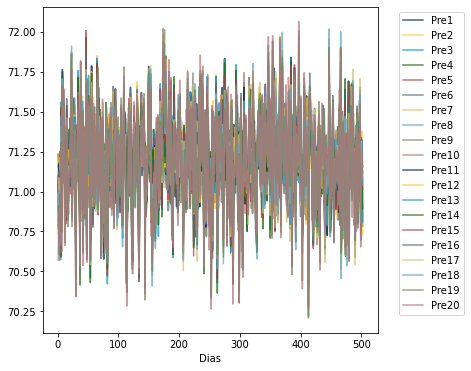

In [17]:
nombreStock = 'AAPL'
dias=502
caminos =20
#nombreStock = 'AMZN'
#todo agregar que lo realice con la fecha de hoy
#agregar que el usuario de tiempo a predecir 
stock=getStockData(nombreStock,start_date='2017-12-29',end_date='2019-12-30')#agregar datetime 
logPrice, adjClose=getClosePrice(stock)

mu=logPrice.mean()
sigma=logPrice.std()#print(mu)#print(sigma)

predictedPrices = [adjClose[-1]]
dt=2/(dias-1)


for i in np.arange(1, caminos + 1):  
    currentPrice=predictedPrices[i - 1]    
    #predictedPrices[i] = currentPrice + changeInPrice(currentPrice,mu,sigma,dt,caminos)#simulacion de
    predictedPrices.append(currentPrice + changeInPrice(currentPrice,mu,sigma,dt,dias))



#graficar las tablas

numeroDias=[x+1 for x in range(dias)]
tabla=Table().with_column('Dias',numeroDias)

for i in range(1,len(predictedPrices)):
    nombreTabla='Pre'+str(i)
    tabla=tabla.with_columns(nombreTabla, predictedPrices[i])
tabla.plot('Dias')


# for i in range(1,len(predictedPrices)):
#     #print(predictedPrices[i])
#     numeroDias=[x+1 for x in range(len(predictedPrices[i]))]
#     #print(numeroDias)
#     nombreTabla='Pre'+str(i)
#     tabla=Table().with_columns('Dias',numeroDias,nombreTabla, predictedPrices[i])
#     tabla.plot('Dias')

# numeroDias=[x+1 for x in range(len(adjClose))]
# apple=Table().with_columns('Dias',numeroDias,'Adj Close', adjClose)
# apple.plot('Dias')


[*********************100%***********************]  1 of 1 completed


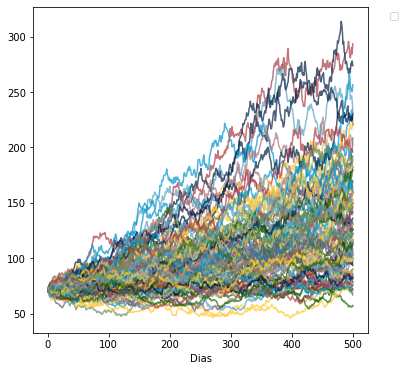

In [45]:
#intento 2
def __main__(nombreStock,dias:int=60,caminos:int=20):
    try:
        stock=getStockData(nombreStock,start_date='2017-12-29',end_date='2019-12-30')#agregar datetime 
    except:
        print('No se logro recuperar información del stock')
    else:
        
        logPrice, adjClose=getClosePrice(stock)
        mu=logPrice.mean()
        sigma=logPrice.std()#print(mu)#print(sigma)

        predictedPrices=[]
        for i in np.arange(1, caminos + 1):  
            precioInicial=adjClose[-1]
            simulacion=np.random.normal(mu,sigma,dias) 
            predictedPrices.append(precioInicial*(simulacion+1).cumprod())

        #graficar las tablas 
        numeroDias=[x+1 for x in range(dias)]
        tabla=Table().with_column('Dias',numeroDias)
        for i in range(1,len(predictedPrices)):
            nombreTabla='Pre'+str(i)
            tabla=tabla.with_columns(nombreTabla, predictedPrices[i])
        tabla.plot('Dias',label='_nolegend_')

        
__main__('AAPL',dias=500,caminos=100)